In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
df = pd.read_csv("dataset/mnist_train.csv")
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#get digits between 0-4
df= df[df['label']<5]
df.tail()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
59985,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59991,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59994,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# get the features and target split
X= df.iloc[:,1:].values
y= df.iloc[:,0].values

In [5]:
# Normalize (optional)
X = X/255.0

In [6]:
#Split the training data

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=.1, random_state=42)


In [7]:
# Load the test dataset

df_test = pd.read_csv("dataset/mnist_train.csv")
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_test = df_test[df_test["label"]<5]
X_test = df.iloc[:,1:].values/255.0
y_test = df.iloc[:,0].values

In [9]:
# Standardize (Optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



In [12]:
# Training
mlp = MLPClassifier(hidden_layer_sizes=(16,32), alpha=0.001, batch_size=100, max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

train_error = 1- accuracy_score(y_train, mlp.predict(X_train))
val_error = 1- accuracy_score(y_val, mlp.predict(X_val))


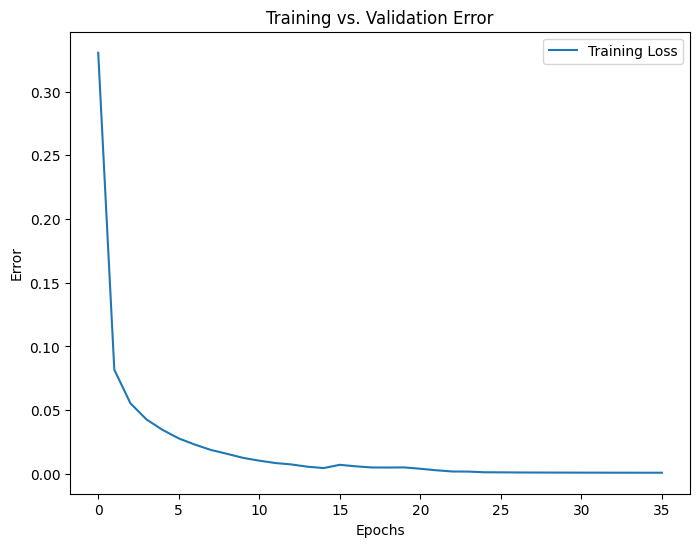

In [17]:
plt.figure(figsize=(8,6))
plt.plot(mlp.loss_curve_, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.title("Training vs. Validation Error")
plt.show()

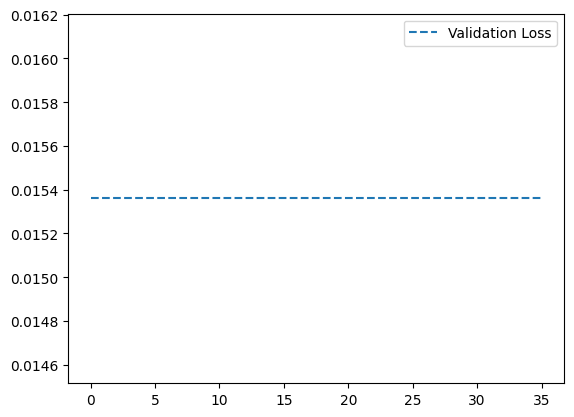

In [18]:
val_loss_curve = []
for epoch in range(len(mlp.loss_curve_)):
    val_predictions = mlp.predict(X_val)
    val_loss = 1 - accuracy_score(y_val, val_predictions)
    val_loss_curve.append(val_loss)

plt.plot(val_loss_curve, label="Validation Loss", linestyle="dashed")
plt.legend()
plt.show()

In [19]:
# Testing
y_pred_test = mlp.predict(X_test)
test_error = 1-accuracy_score(y_test, y_pred_test)

print(f"Training Error: {train_error:.4f}")
print(f"Validation Error: {val_error:.4f}")
print(f"Test Error: {test_error:.4f}")

Training Error: 0.0000
Validation Error: 0.0154
Test Error: 0.0015


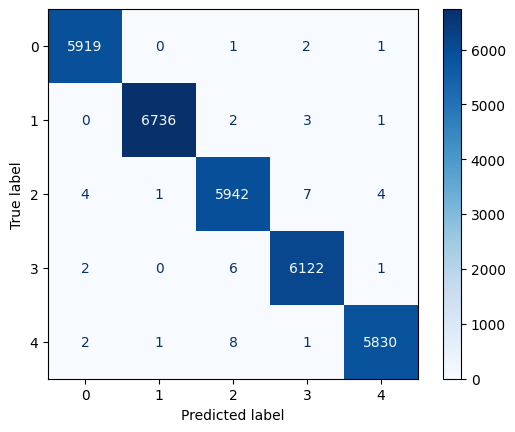

In [20]:
cm = confusion_matrix(y_test, y_pred_test)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4])
display.plot(cmap="Blues")
plt.show()